# 3. Working with data

<div style="background-color:wheat">
<strong>Goal of this notebook.</strong>
<ul style="margin-top: 0px">
<li>Get used to the standard ways of thinking about data, _data frames_ and _indexed arrays_</li>
<li>Learn how to use the <a href="http://pandas.pydata.org/">Pandas</a> library to handle data</li>
<li>See some more advanced plotting with <a href="https://matplotlib.org/">matplotlib</a></li>
</ul>

## 3.0 Preamble

At the top of almost every piece of data-oriented scientific computing work, we'll import these standard modules.

In [3]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
import numpy as np
import pandas
import matplotlib
import matplotlib.pyplot as plt
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline 

The running example for this section is a dataset of stop-and-search records, [made available](https://data.police.uk/data/) by the UK home office. It's a large file, 172MB, so I like to download it to disk, so it's fast to read it each time I restart the notebook. Here's how we can fetch a file from a url, using the Unix command-line tool `wget`. (The exclamation mark is called a _Jupyter magic_, and it means "Treat this line as though it were executed at the command prompt". In IB _Unix Tools_ you'll learn more about the Unix command line.)

In [ ]:
# Execute a unix command to download a file (if it's not already downloaded), and show download progress
!if [ -e "stop-and-search.csv" ]; then echo "file already downloaded"; else wget "https://teachingfiles.blob.core.windows.net/founds/stop-and-search.csv"; fi 

# 3.1 What data looks like<span id="dataframes"></span>

We almost always work with data in the form of a spreadsheet-like table, often referred to as a _data frame_. Here's how to load a dataframe from a file and inspect it. (This dataframe will be used as a running example in the rest of this section of notes.)

In [4]:
# Import a dataframe using the pandas library
stopsearch = pandas.read_csv('stop-and-search.csv')

# How many rows are there?
print("This dataset has", len(stopsearch), "rows")
# Display the first 3 rows. iloc[:3] means "select the first three rows"
stopsearch.iloc[:3]

This dataset has 808101 rows


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,year,month,police_force
0,Person search,2014-07-31T23:20:00+00:00,NaN,NaN,50.938234,-1.388559,Male,25-34,Asian or Asian British - Pakistani (A2),Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,2014,8,hampshire
1,Person search,2014-07-31T23:30:00+00:00,NaN,NaN,50.912978,-1.431990,Male,over 34,White - White British (W1),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,NaN,NaN,2014,8,hampshire
2,Person search,2014-07-31T23:45:00+00:00,NaN,NaN,51.005612,-1.497576,Male,10-17,White - White British (W1),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,2014,8,hampshire


A dataframe is a collection of named columns. Each column has the same length, and all entries in a column have the same type, though different columns may have different types. If you have taken IA/IB _Databases_, you'll see that dataframes are similar to tables in a relational database. There are some differences:
* Scientific data is best thought of as logs of observations. Observed facts cannot be unobserved, so UPDATE and DELETE database operations are irrelevant, as are questions about database consistency.
* A dataframe has ordered rows, like a matrix, whereas a relation is unordered. (The output of an SQL query can be ordered, therefore it's not a relation.)
* We are often given messy badly structued data to work with; and we often create dataframes on the fly, work with them for a while, then discard them. There is rarely a phase of entity-relationship modeling: instead we learn how to think about a dataset by working with it.

In Python, there are several choices about how to represent dataframes. A simple choice is as a dictionary of lists:
```
mydata = {'police_force': ['hampshire', 'hampshire', 'hampshire', ...],
          'Age range': ['25-34', 'over 34', '10-17', ...],
          'year': [2014, 2014, 2014, ...],
          ...}
```
We will instead use the [Pandas](http://pandas.pydata.org/) library, designed specifically for working with data. It has several benefits:

* Data import and export has lots of fiddly corner cases. Even printint a dataframe takes a surprisingly large amount of code to do well.
* For fast numerical computation and concise code, `numpy` is best as we saw in [&sect;2](2.%20Numerical%20computation.ipynb). Pandas stores dataframe columns as `numpy` vectors.
* Some simple operations, like selecting a subset of rows, takes a lot of boilerplate code if implemented in pure Python. Much better to use a Pandas dataframe, which lets us write e.g. `stopsearch[:3]` to automatically apply the row selection to each of the columns.

It has the disadvantage of being yet another class to learn. It also has some idiosyncratic notation for indexing, which in my experience can lead to
rather cryptic error messages when plotting, and which will be covered in [&sect;3.2](#indexing). It has poor support for missing values in data, which it inherits from `numpy`. Despite these problems, it's the best choice at this stage in Python's evolution.

## 3.2 Importing, exporting, and creating dataframes

It's very easy to import data from a simple comma-separated value (CSV) file. A CSV file looks like this:

>```
>"Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species"
>5.1,3.5,1.4,0.2,"setosa"
>4.9,3,1.4,0.2,"setosa"
>4.7,3.2,1.3,0.2,"setosa"
>4.6,3.1,1.5,0.2,"setosa"
>5,3.6,1.4,0.2,"setosa"
>```

i.e. a header line, then one line per row of the data frame, with values separated by commas.
We've already seen how to import a CSV, using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).
If your file is nearly a CSV but has some quirks such as comments or a missing header row, experiment with the 55 options in [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

We can use the same function to read CSV files from remote urls (though if you're using Azure Notebooks, be aware that Azure only permits you to connect to Azure web servers.)

In [ ]:
import urllib.request  # standard Python library for url requests
iris = pandas.read_csv(urllib.request.urlopen('https://teachingfiles.blob.core.windows.net/scicomp/iris.csv'))

In my experience, around 70% of the time you spend working with data will be fighting to import it and clean it up. See
[&sect;A3. Data import and cleanup](A.%20Data%20import%20and%20cleanup.ipynb) for a collection of recipes for web scraping, reading from a database, and parsing log files.

To write a CSV file,
```
iris.to_csv('iris.csv', index=False)
```
If you're running this notebook with Azure Notebooks, you would then use the `Data | Download` menu to download the file from Azure Notebooks to your local machine.

To create a dataframe from scratch, pass in a dictionary of columns. Python dictionaries are unordered, so you can optionally specify the column order you want with the `columns` argument.

In [ ]:
iris = pandas.DataFrame({'species': ['setosa', 'virginica', 'virginica', 'setosa', 'versicolor'],
                         'Petal.length': [1.0, 5.0, 5.8, 1.7, 4.2],
                         'Petal.width': [0.2, 1.9, 1.6, 0.5, 1.2]},
                        columns = ['species', 'Petal.length', 'Petal.width'])

Or you can create a dataframe from a list of tuples. Now the `columns` argument is needed to say what the names are.

In [ ]:
iris = pandas.DataFrame([('setosa', 1.0, 0.2), ('virginica', 5.0, 1.9), ('virginica', 5.8, 1.6), ('setosa', 1.7, 0.5), ('versicolor', 4.2, 1.2)],
                        columns = ['species', 'Petal.length', 'Petal.width'])

A dataframe behaves like a dictionary of vectors, and you can add and remove columns using the same syntax you'd use for dictionaries. When you add new columns, Pandas converts them to `numpy` vectors for you, so you can use the usual `numpy` operations. (The columns aren't actually plain `numpy` vectors, as [&sect;3.3](#indexing) explains, and the difference will bite you whenever you try to subset a column.)

In [ ]:
iris.keys()                                                # what column names are present?
iris['Sepal.length'] = [4.6, 6.3, 7.2, 5.1, 5.7]           # add a column
if 'Petal.width' in iris: del iris['Petal.width']          # delete a column (if present)
iris['P/S'] = iris['Petal.length'] / iris['Sepal.length']  # vectorized whole-column operation
iris

## 3.3 Selecting from a dataframe
Dataframes have a triple identity: part array, part database table, part dictionary. Because of this, there are several ways to select subsets of rows and columns.

Selecting columns is easy. We've already seen how to select one column. To select several columns,

In [ ]:
# Select three columns, and print out the first 5 rows of the resulting dataframe
stopsearch[['Date', 'Object of search', 'Legislation']].iloc[:5]

To select subsets of rows by row number use `iloc[row_indexes]`. This can take any slice or list of integers.

In [ ]:
stopsearch.iloc[:3]       # the first 3 rows; stopsearch[:3] is an abbreviation for this
stopsearch.iloc[[0,3,5]]  # select several rows, by providing a list of row numbers
stopsearch.iloc[[5]]      # select a dataframe object consisting of just one row
stopsearch.iloc[:3][['Date', 'Object of search']]  #first a row selector, then a column selector

To select subsets of rows by a boolean vector use `loc[rows_indicator]` where `rows_indicator` is a boolean vector as long as the dataframe. You can optionally also specify a list of columns to select.

In [ ]:
wantcols = ['Date', 'Object of search', 'Outcome']
wantrows = stopsearch['police_force'] == 'cambridgeshire'  # a boolean vector
stopsearch.loc[wantrows, wantcols][:3]

There is a third way to select rows from a dataframe, which in my experience is the source of endless confusion. 
We won't be using it in this course, but it's worth knowing it exists so you can understand the cryptic errors and error messages you will undoubtedly come across.

When you see a Pandas dataframe printed out, there is a column at the left printed in bold. These aren't row numbers, they are _row indexes_, which behave like the keys in a dictionary. (In all the examples we've seen so far the indexes happen to be row numbers, but they could be any other Python object.) Pandas remembers row indexes, even when you pull out a single column, and it always tries to match indexes. This is usually not what we want.

<span style="background-color: red; color:white; padding:2pt; margin-right:.5ex">
Always use <code style="background-color:red; color:white">.values</code> when you are working with subsets of rows.
</span>
This gives you the actual `numpy` vector behind the column, not the confusing Pandas vector-plus-index object.

In [ ]:
df = pandas.DataFrame({'x': [3,3,4,8,2,7,6]})

# This looks like it's adding [3,3,4,8] and [8,2,7,6] -- but it's not!
df['x'][:4] + df['x'][-4:]

# This is the way to do it
df['x'][:4].values + df['x'][-4:].values

## 3.4 Tabulations and indexed arrays
The pattern behind much data processing is split-apply-combine-join: split your data into pieces, apply a transformation to each piece, combine the pieces, and join results from different datasets together. We could code this explicitly with a `for` loop, but it would involve lots of boilerplate code &mdash; and I hope you have been persuaded by [&sect;2](2.%20Numerical%20computation.ipynb) that `for` loops are considered harmful. Instead, let's see how to do it with Pandas.

The following line of code splits the data into a separate dataframe for each combination of officer-defined ethnicity and gender, applies the `len` function to each sub-dataframe to get the number of rows it contains, and combines the results into a single indexed array. (For this course, we will only `apply` functions that return simple Python values; it's [more complicated](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to apply functions that return dataframes or indexed arrays.)

In [ ]:
x = stopsearch.groupby(['Officer-defined ethnicity', 'Gender']).apply(len)
x

This command has produced an _indexed array_.
An indexed array is similar to a normal `numpy` array. It can be indexed using `[]`, but now the indexes aren't integer positions, they're values from the underlying column. Also, the array might be 'incomplete'; in this case there is no entry for `['Mixed','Other']`.

In [ ]:
x['Asian']             # select one 'row' (i.e. one value in dimension 1, all values in dimension 2)
x[:, 'Other']          # select an entire 'column' (i.e. all values in dimension 1, one value in dimension 2)
x[['Mixed','White']]   # select two 'rows' (i.e. two values in dimension 1, all values in dimension 2)

To pretty-print an indexed array, use [`unstack()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unstack.html). It will by default fill in any missing values with `NaN` (not a number).

In [ ]:
x[['Mixed','White']].unstack()

To convert an indexed array to a regular dataframe, use `reset_index`. You can tell it what name to use for the values in the array.

In [ ]:
x[['Mixed','White']].reset_index(name='count')

 There are two basic ways to store data in Pandas, dataframes and indexed arrays, and the skill in working with data is knowing which representation works best for your task.
 What I'm calling an indexed array, Pandas calls a [multi-indexed](https://pandas.pydata.org/pandas-docs/stable/advanced.html) [`Series`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html).
If you get deeper into working with data, you will learn that Pandas blurs the boundary between dataframes and indexed arrays.

**Exercise.** Tabulate an existing column of a dataframe.

**Exercise.** Find the most frequent value in a column.
```
def mode(x):
    vals,counts = np.unique(z, return_counts=True)
    return vals[np.argmax(counts)]

# Take the subset of rows where Age range is not missing
df = stopsearch.loc[~pandas.isnull(stopsearch['Age range'])]
# Group the dataframe by ethnicity, select the Age range column, and apply our function
df.groupby(['Officer-defined ethnicity', 'Gender']).apply(lambda df: mode(df['Age range']))
```

## 3.5 Joining datasets
Suppose we want to know the fraction of stop-and-search suspects for which the search turned up something suspicious. This can be achieved by simply tallying the `Outcome` column of the dataframe. But what if we want to break this number down by ethnicity, to look for evidence of racial bias? We could do this with a `for` loop, looking at each ethnic group in turn &mdash; but `for` loops are considered harmful, and a better way to do it is by combining tables, as follows. (This is the equivalent of `JOIN` in SQL, which you learn about in IA/IB _Databases_.)

In [ ]:
# The 'Outcome' column has lots of possible values. Let's simplify it to just two.
stopsearch['outcome'] = np.where(stopsearch['Outcome'] == 'Nothing found - no further action', 'nothing', 'find')

# Create a table of the number of rows for each ethnicity : outcome
x = stopsearch.groupby(['Officer-defined ethnicity', 'outcome']).apply(len).reset_index(name='n')
# Create a table of the number of rows for each ethnicity
y = x.groupby('Officer-defined ethnicity')['n'].apply(sum).reset_index(name='ntot')

# Merge the two tables
z = x.merge(y, on='Officer-defined ethnicity')

# Compute the ratio n/ntot, and display percent_find for each ethnicity
z['percent_find'] = z['n'] / z['ntot'] * 100
z.loc[z['outcome']=='find', ['Officer-defined ethnicity','percent_find']]

It's also possible to join indexed arrays on their common indices, and that would be a more natural way to write the calculation above, but that counts as advanced Pandas usage.

## 3.6 Approaching a dataset

In [21]:
stopsearch['Date'].describe()

count                        808101
unique                       385633
top       2015-05-23T23:00:00+00:00
freq                            463
Name: Date, dtype: object

In [60]:
import re
pattern = re.compile(r'\d\d\d\d-\d\d-\d\dT(\d\d):(\d\d):(\d\d(\.\d+)?)\+00:00')
def as_hour(s):
    m = pattern.match(s)
    return int(m.group(1)) + int(m.group(2))/60 + float(m.group(3))/3600 if m else np.nan
as_hour('2015-03-31T23:54:51.473000+00:00')

23.914298055555555

In [63]:
stopsearch['hour'] = np.vectorize(as_hour)(stopsearch['Date'])
stopsearch.loc[np.isnan(stopsearch['hour'])]

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,year,month,police_force,hour


In [65]:
stopsearch['hour'].describe()

count    808101.000000
mean         14.211017
std           7.308990
min           0.000000
25%          10.400000
50%          15.750000
75%          20.183333
max          23.999444
Name: hour, dtype: float64

In [66]:
np.nanpercentile(stopsearch['hour'], q=[0,25,50,75,100])

array([  0.        ,  10.4       ,  15.75      ,  20.18333333,  23.99944444])

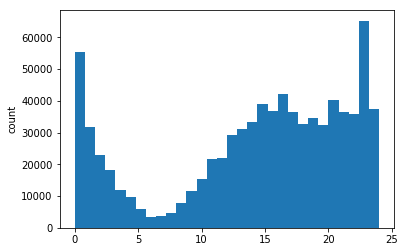

In [67]:
plt.hist(stopsearch['hour'], bins=30)
plt.ylabel('count')
plt.show()

In [85]:
stopsearch['Age range'].describe()

count     759820
unique         5
top        18-24
freq      292998
Name: Age range, dtype: object

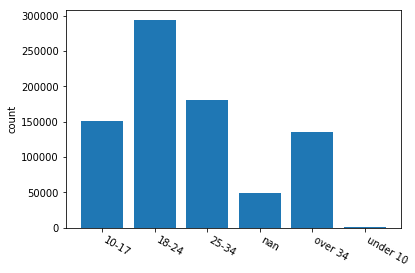

In [84]:
vs,ns = np.unique(stopsearch['Age range'].astype(str), return_counts=True)
xs = np.arange(len(vs))
plt.bar(xs, ns, align='center')
plt.xticks(xs, vs, rotation=-30, ha='left')
plt.ylabel('count')
plt.show()

In [90]:
pandas.DataFrame({'value':vs, 'count':ns}).iloc[np.argsort(ns)[::-1]][:3]

,count,value
1,292998,18-24
2,180725,25-34
0,150286,10-17


## 3.7 Wrangling a dataset

* Number stopped, number find on each day of the week: bar chart with std.err. Exploding, grouping, bar chart & errors
* Stopped and found histograms, one plot per day of the week. Facet, plot grouping.

np.astype(int) etc.

## 3.3 Numerical data<a name="numerical"></a>
After importing the `flood` data frame, and looking at a few sample rows, we'll inspect it more thoroughly. Let's look at the `value` column. The sample rows suggest that it's numerical, and we can verify this by checking its type:

In [ ]:
flood['value'].dtype

A quick way to get a sense of the distribution is to find its percentiles, e.g. the 25 %ile is what you get if you sort the numbers from lowest to highest and look 25% of the way along. Numpy has a function [`np.percentile`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) for this, and also [`np.nanpercentile`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanpercentile.html) which removes NaN ("not a number") items first.

In [ ]:
np.nanpercentile(flood['value'], q=[0, 25, 50, 75, 100])

For convenience, `res.stats.summary` computes these percentiles, and also shows the mean (computed by [`np.nanmean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html) to remove NaNs first) and the count of how many NaNs there are.

In [ ]:
summary(flood['value'])

Or we can show the distribution of values with a histogram.

In [ ]:
x = flood['value']
x = x[~np.isnan(x)]    # plt.hist needs us to remove NaN values first
plt.hist(x, bins=30)
plt.ylabel('count')
plt.show()

## 3.4 Categorical data<a name="categorical"></a>
Let's look at another column, `flood['town']`, which is not numerical. Let's see the most frequent values and their counts.

In [ ]:
vs,ns = np.unique(flood['town'], return_counts=True)  # the unique items, and the count of each
i = np.argsort(-ns)[:5]                                # the indexes of up to 5 items with the highest counts
np.vstack([vs[i], ns[i]]).T                            # show one column for these items, and one for the counts

For convenience, `res.stats.summary` does this tabulation (and also prints out how many further items there are, if any).

In [ ]:
summary(flood['town'])

Or we can show the distribution of values with a histogram. We have to do the counting ourselves then draw bars with 
[`matplotlib.pyplot.bar`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar).

In [ ]:
vs,ns = np.unique(flood['town'], return_counts=True)
xs = np.arange(len(vs))                               # pick x-coordinates 0, 1, ..., len(vs)-1
plt.bar(xs, ns, align='center')                       # use width=... to set the bar width
plt.xticks(xs, vs, rotation=-30, ha='left')           # label the x-coordinates of the bars
plt.ylabel('count')
plt.title('label')
plt.show()

## 3.5 Splitting numbers into categories<a name="cut"></a>
Sometimes it's useful to simplify a numerical column by splitting it into categories, e.g. bottom third, middle third, top third. We can find the breakpoints with [`np.percentile`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html), and find the categories with [`np.digitize`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html).

In [ ]:
# Each measurement station has its own 'low' and 'high' ranges.
# Let's normalize the values, so that low=0 and high=1, and categorize these normalized values.
x = (flood['value'] - flood['low']) / (flood['high'] - flood['low'])

# np.digitize returns integers saying which bin each number falls in.
# We'll cast it to be a string, so that summary() displays it as categorical.
y = np.digitize(x, bins=np.nanpercentile(x, [100/3, 200/3]))
summary(y.astype(str))

Bothersomely, `np.digitize` lumps NaNs into the highest bin, which is misleading. For convenience, `res.stats.cut` takes care of NaNs, and it also gives more helpful labels to the categories.

In [ ]:
summary(cut(x, breaks=2))

In [ ]:
pandas.cut(x, bins=2)

<div style="background-color:wheat"><strong>Excercise.</strong>
The <code style="background-color:wheat">cut</code> function uses 
<code style="background-color:wheat">np.nanpercentile</code> to split the data into equal percentile ranges.
So why are the counts not equal?
</div>

## 3.6 Geographic data<a name="geo"></a>
This data frame has columns `lat` and `lng` which are likely map coordinates. Matplotlib does have routines for map plots (see the [example gallery](https://matplotlib.org/basemap/users/examples.html)), and there are also many contributed libraries of varying quality. Here is a quick and dirty plot on top of Google Maps.

<div style="background-color:red; color:white">
TODO: make sure this output works reliably! Do I need my own maps API token? Different plotting library?
</div>

In [ ]:
# Create a numpy Record Array, with one record for each (lat,lng) pair
latlngs = np.rec.fromarrays([flood['lat'], flood['lng']], names=['lat','lng'])
# Count the number of flood readings for each unique (lat,lng)
vs, ns = np.unique(latlngs, return_counts=True)

In [ ]:
#!pip3 install gmplot -q                            # install a library for Google Map plots
import gmplot
import IPython.display                              # allows Python code to show html in the notebook

gmap = gmplot.GoogleMapPlotter(52.212, 0.1208, 12)  # define the center of the view, and the zoom level
for lat,lng,n in zip(vs.lat, vs.lng, ns):           # add circles at every (lat,lng) pair  
    gmap.circle(lat, lng, n/10)                     # (though these are too small for a zoomed-out map)

gmap.draw('res/map.html')
IPython.display.IFrame(src='res/map.html', width=600, height=400)

## 3.7 Grouped statistics<a name="groupby"></a>
So far we've only looked at one column at a time. Let's now turn to the relationship between columns (also known as [multivariate analysis](https://en.wikipedia.org/wiki/Multivariate_statistics), as opposed to the univariate analysis we've seen so far). For example, what's the typical range of water levels (`value`) at each measurement station (`label`)? To find this, we need to group the rows of the dataframe, one row for each value of `label`, and for each group we'll compute the mean and standard deviation.

In [ ]:
res = {'label':[], 'n':[], 'mean':[], 'sd':[]}
for lbl in np.unique(flood['label']):
    i = flood['label'] == lbl
    res['label'].append(lbl)
    res['n'].append(np.count_nonzero(i))
    res['mean'].append(np.nanmean(flood['value'][i]))
    res['sd'].append(np.nanstd(flood['value'][i]))

# Bar plot, with error bars
xs = np.arange(len(res['label']))
plt.bar(xs, res['mean'], align='center', facecolor='wheat')
plt.errorbar(xs, res['mean'], yerr=res['sd'], linestyle='None', ecolor='k')
plt.xticks(xs, res['label'], rotation=-30, ha='left')
plt.ylabel('value')
plt.title('Mean and standard deviation of water levels at each station')
plt.show()

<div style="background-color:wheat"><strong>Exercise.</strong>
Implement the above code more efficiently, using vectorized operations rather than a <code style="background-color:wheat">for</code> loop. Hint: <a href="https://stackoverflow.com/a/23271510">stackoverflow.com/a/23271510</a>.
What is the complexity of the above code in terms of <em>n</em>, the length of the vector, and <em>k</em>, the number of unique levels?
</div>

## 3.8 Facet plots<a name="facet"></a>
To show more details at each measurement station, we can split the plot out into many subplots, one per station. This is called a _facet plot_ or a _panel plot_ or a _small multiples_ plot. [According to the plotting guru Edward Tufte](https://en.wikipedia.org/wiki/Small_multiple),
<blockquote>
At the heart of quantitative reasoning is a single question: Compared to what? Small multiple designs, multivariate and data bountiful, answer directly by visually enforcing comparisons of changes, of the differences among objects, of the scope of alternatives. For a wide range of problems in data presentation, small multiples are the best design solution.
</blockquote>

This code uses [`fig.add_subplot`](https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot) to add panels one by one, for each level of `flood['label']`. If we had wanted a two dimensional grid of subplots, split by the levels of two categorical columns, we could have used [`plt.subplots(...)`](https://matplotlib.org/examples/pylab_examples/subplots_demo.html) to create the full grid of panels in one go, as in
[these demos](https://matplotlib.org/examples/pylab_examples/subplots_demo.html).

Previously we have used commands like `plt.hist()` to draw histograms, but this code uses `ax.hist()` where `ax` is an `Axes` object. All the plotting routines are actually [`Axes` methods](https://matplotlib.org/api/axes_api.html), and the `plt.*` methods are just aliases. When you look for code snippets on the web, you'll find both styles.

In [ ]:
norm_value = (flood['value'] - flood['low']) / (flood['high'] - flood['low'])
labels = np.unique(flood['label'])

fig = plt.figure()
for i,lbl in enumerate(labels):
    ax = fig.add_subplot(3, 3, i+1)        # numrows=3, numcols=3, new subplot in the (i+1)th position
    x = norm_value[flood['label'] == lbl]
    x = x[~np.isnan(x)]                    # remove NaN values since ax.hist doesn't work with them
    ax.hist(x)
    ax.set_title(lbl)

To make the plot look lovely, we need some plot-tweaking.

* `fig.add_subplot` lets us [specify axes to be shared](https://matplotlib.org/users/recipes.html). The code below makes all the subplots share the same x axis as the top left subplot.

* Since all the subplots share the same x axis, but the data for each plot is different, `ax.hist` will choose different bins for each subplot. It looks better to force them all to use the same bins.

* Use `plt.get_cmap(name, n)` to get a colour map with `n` values, where `name` is one of the [standard colour-map names](https://matplotlib.org/users/colormaps.html).

In [ ]:
labels = np.unique(flood['label'])
norm_value = (flood['value'] - flood['low']) / (flood['high'] - flood['low'])
bins = np.linspace(min(norm_value), max(norm_value), 40)

with matplotlib.rc_context({'figure.figsize': [10,6], 'figure.subplot.hspace': 0.3}):
    colors = plt.get_cmap('Set2', len(labels))
    fig = plt.figure()
    ax0 = None
    for i,lbl in enumerate(labels):
        if ax0 is None:
            ax = fig.add_subplot(3, 3, i+1)
            ax0 = ax
        else:
            ax = fig.add_subplot(3, 3, i+1, sharex=ax0)
        x = norm_value[flood['label'] == lbl]
        x = x[~np.isnan(x)]
        ax.hist(x, bins=bins, facecolor=colors(i), edgecolor='0.7')
        ax.set_title(lbl)
    fig.suptitle('Normalized value')

<div style="background-color:wheat"><strong>Exercise.</strong>
Which values of <em>i</em> correspond to the three bottom-most panels?
Use <code style="background-color:wheat">ax.get_xaxis().set_visible(False)</code> to turn off the ticks on all the other panels, so the panel labels can be read cleanly.
<em>Solution: if <code style="background-color:wheat">i + 3 &geq; len(labels)</code> then panel <em>i</em> is bottom-most.</em>
</div>

## 3.9 Grouped plots (and timestamps)<a name="grouped"></a>
Here's another way to show grouped data. Again we'll plot each measurement station (`label`) separately, but this time we'll plot the water level (`value`) as a function of time (`t`). The lines for each station can happily fit on the same panel, and we'll add a legend.

The first step is to fix up the time column, so that `matplotlib` knows it's a timestamp and not just a string, so that it will display nicely. As [xkcd](https://www.xkcd.com/1883/) observes, timestamps are a nuisance because of timezones &mdash; and also because of unequal months and leap years and so on, which make it hard work to get axes right in plots.

<a href="https://www.xkcd.com/1883/"><img src="https://imgs.xkcd.com/comics/supervillain_plan.png" style="height:30em" alt="supervillain timezone woes"></a>

In [ ]:
import datetime, pytz
x = flood['t']
# Parse the timestamp strings (see https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime)
x = [datetime.datetime.strptime(tstr, '%Y-%m-%dT%H:%M:%SZ') for tstr in x]
# Mark each timestamp as a UTC timestamp
# which is what the docs say they are: http://environment.data.gov.uk/flood-monitoring/doc/reference
x = [t.replace(tzinfo=pytz.utc) for t in x]
# Convert to a local timestamp (which in this case is British Summer Time, one hour off UTC)
local_tz = pytz.timezone('Europe/London')
x = [t.astimezone(local_tz) for t in x]
# Store it in the data frame as a numpy vector, so we can use numpy indexing on it
flood['t2'] = np.array(x)

The plotting code below uses the same core logic for splitting by `label` that we've used before. This time, for each level of `label`, we call `ax.plot(x,y,lbl)`. This picks a different colour each time, and it remembers the association between colours and labels, so that `ax.legend()` can draw the right thing.

In [ ]:
labels = np.unique(flood['label'])

# Set the plot size to be 10x6 nominal inches, for this plot only.
# See https://matplotlib.org/users/customizing.html for more customization options.
with matplotlib.rc_context({'figure.figsize': [10,6]}):
    
    fig,ax = plt.subplots()
    for lbl in labels:
        i = flood['label'] == lbl
        t,v = flood['t2'][i], flood['value'][i]
        # Sort the readings by time, because otherwise the line could go back and forth across the plot
        j = np.argsort(t)
        ax.plot(t[j], v[j], linestyle='-', label=lbl)
    ax.legend()
    
    # Date axis tweaking taken from https://matplotlib.org/examples/api/date_demo.html
    ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.MO, tz=local_tz))
    ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator(tz=local_tz))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%a %d %b'))
    ax.set_ylim(-0.8, 1.1)
    ax.grid(True, axis='x', color='0.8')
    fig.autofmt_xdate(bottom=0.2, rotation=-30, ha='left')

What is `fig,ax = plt.subplots()` about? The default arguments are [`plt.subplots(nrows=1,ncols=1)`](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots), i.e. it creates a 1&times;1 grid of subplots, and it returns a [`Figure`](https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure) object and an [`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) object. The former has methods for modifying the plot as a whole, and the latter has all the methods for actually plotting data plus methods for tweaking how the axis is shown. When we use `plt.plot()` it's actually just wrapper that retrieves the current axes then calls `ax.plot()`.

## 3.10 Cross tabulation<a name="crosstab"></a>
Cross tabulation lets us see how two or more categorical variables relate to each other. For example, let's find out how many readings there are in each town, and for each river.

In [ ]:
# Get the list of unique towns, and let itowns[i] be the town that row i of the dataframe belongs to.
# Likewise for rivers.
towns,itowns = np.unique(flood['town'], return_inverse=True)
rivers,irivers = np.unique(flood['river'], return_inverse=True)
# Create an empty array with one row per town, one column per river
x = np.zeros([len(towns), len(rivers)])
# Tally up the number of readings corresponding to each cell of the array.
for it,ir in zip(itowns, irivers):
    x[it,ir] += 1
x

It's painful to have to write multiple lines of code every time we want a simple cross tabulation, and the output doesn't show row and column labels. This is where library routines come into their own, specifically 
[`pandas.crosstab`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)
and [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) and [`unstack`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack). The `pandas` syntax is powerful but takes some getting used to, so instead here's a simple wrapper function, `res.stats.crosstab`.

In [ ]:
crosstab('town', 'river', data=flood)

Cross-tabulation is useful for figuring out the contents of a data set you've been given. Let's work out how many measurement stations there are for each town and each river:

In [ ]:
# Produce a data frame x with one row per town:river:measure_id.
# (crosstab produces a table by default, but with format_='DataFrame' it produces a pandas.DataFrame.)
x = crosstab('town','river','measure_id', data=flood, format_='DataFrame')
# For each town:river, how many rows does x have i.e. how many measurement stations?
crosstab('town', 'river', data=x)

<div style="background-color:wheat"><strong>Exercise.</strong>
(Advanced practice at <code style="background-color:wheat">numpy</code> vectorized coding.)
Rewrite the explicit tabulation code, using vectorized operations rather than a <code style="background-color:wheat">for</code> loop.
<em>Solution:</em>
<pre style="background-color:wheat">
idx,ns = np.unique(np.vstack([itowns,irivers]).T, axis=0, return_counts=True)
x = np.zeros([len(towns), len(rivers)])
x[tuple(idx.T)] = ns
</pre>
</div>

## 3.11 Merging dataframes<a name="merge"></a>
Consider these two questions about the flood data:

* We've seen how to compute the mean and standard deviation of water level at each measurement station. How can we use these to standardize all the readings, per station?
* How can we compute the weekly rate of change at each station, i.e. the average value in a week, minus the value in the previous week?

These are questions that we can answer by merging dataframes, or `JOIN`ing them as it's referred to in IA _Databases_. 
It's possible to implement this yourself in plain Python, but there's no reason not to use
[`pandas.DataFrame.merge()`](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).
Here is a simple example.

In [ ]:
# Find the mean and standard deviation per station, as in Section 3.5.
stations = {'label':[], 'mean':[], 'sd':[]}
for lbl in np.unique(flood['label']):
    i = flood['label'] == lbl
    stations['label'].append(lbl)
    stations['mean'].append(np.nanmean(flood['value'][i]))
    stations['sd'].append(np.nanstd(flood['value'][i]))

# Do the merge, and (optionally) convert it back to a plain Python dictionary
flood2 = pandas.DataFrame(flood).merge(pandas.DataFrame(stations), on='label')
flood2 = OrderedDict((k, v.values) for k,v in flood2.items())

The same plotting code as in Section 3.7, but applied to the standardized values `(flood2['value']-flood2['mean'])/flood2['sd']` now looks like this:
![standardized water levels](res/normts.png)

<div style="background-color:wheat"><strong>Exercise.</strong>
To compute weekly rate of change, what two dataframes should we merge, and what join key should we use? 
<em>Hint: the join key should be a list of two column names.</em>.
</div>